In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
def plot(axes, x, y, title):
    axes.scatter(x, y, s=6)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [4]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data
    
#data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw['N'] = data_raw['size']**2
data_raw.head(10)

,size,B,temperature,job,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N
0,40,0.0,1.68,1,-3047.772599,9.290421e+06,-1555.541358,2.419882e+06,0.027149,1555.541358,1600
1,40,0.0,1.68,8,-3047.985921,9.291696e+06,-1555.655805,2.420233e+06,0.027121,1555.655805,1600
2,40,0.0,1.68,4,-3047.886513,9.291114e+06,-1555.618687,2.420122e+06,0.027100,1555.618687,1600
3,40,0.0,1.68,6,-3048.447976,9.294500e+06,-1555.804704,2.420697e+06,0.027046,1555.804704,1600
4,40,0.0,1.68,3,-3046.911631,9.285139e+06,-1555.344035,2.419264e+06,0.027199,1555.344035,1600
5,40,0.0,1.68,7,-3048.036051,9.291980e+06,-1555.629033,2.420151e+06,0.027068,1555.629033,1600
6,40,0.0,1.68,2,-3047.358114,9.287906e+06,-1555.397899,2.419439e+06,0.027175,1555.397899,1600
7,40,0.0,1.68,9,-3047.472241,9.288546e+06,-1555.531865,2.419846e+06,0.027186,1555.531865,1600
8,40,0.0,1.68,10,-3047.360887,9.287870e+06,-1555.491014,2.419720e+06,0.027228,1555.491014,1600
9,40,0.0,1.68,5,-3047.822089,9.290708e+06,-1555.589569,2.420033e+06,0.027141,1555.589569,1600


<AxesSubplot:>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


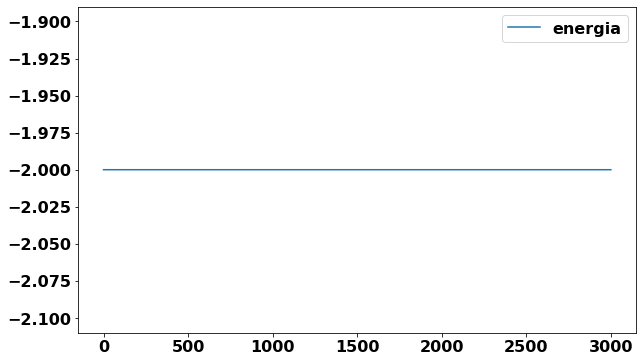

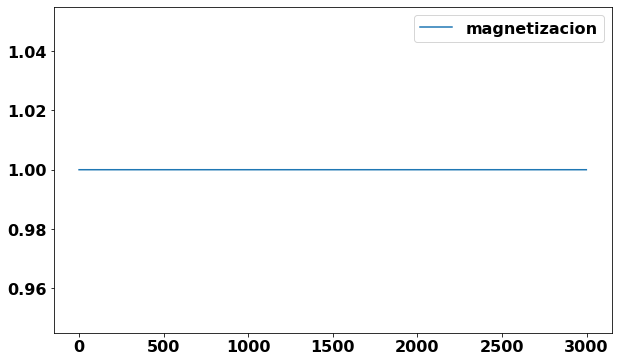

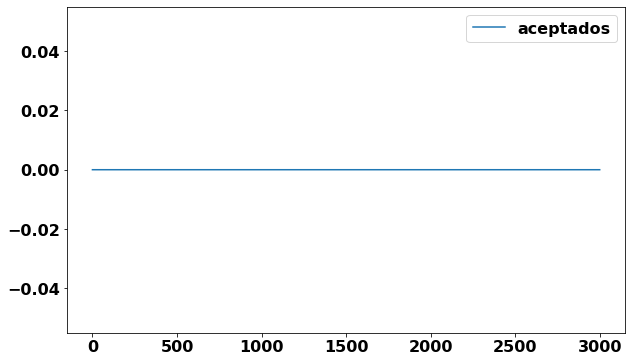

In [5]:
size = 100
temperature = 0.2
job = 1
output_file = f'{size}_size/0.0_B/{temperature:.3}_temp/{job:02}_JOB/output.dat'

run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion', 'aceptados'])
run_data.head()
run_data.energia=run_data.energia/(size**2)
run_data.magnetizacion=run_data.magnetizacion/(size**2)
run_data.plot(y=['energia'], figsize=(10, 6))
run_data.plot(y=['magnetizacion'], figsize=(10, 6))
run_data.plot(y=['aceptados'], figsize=(10, 6))

3000

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


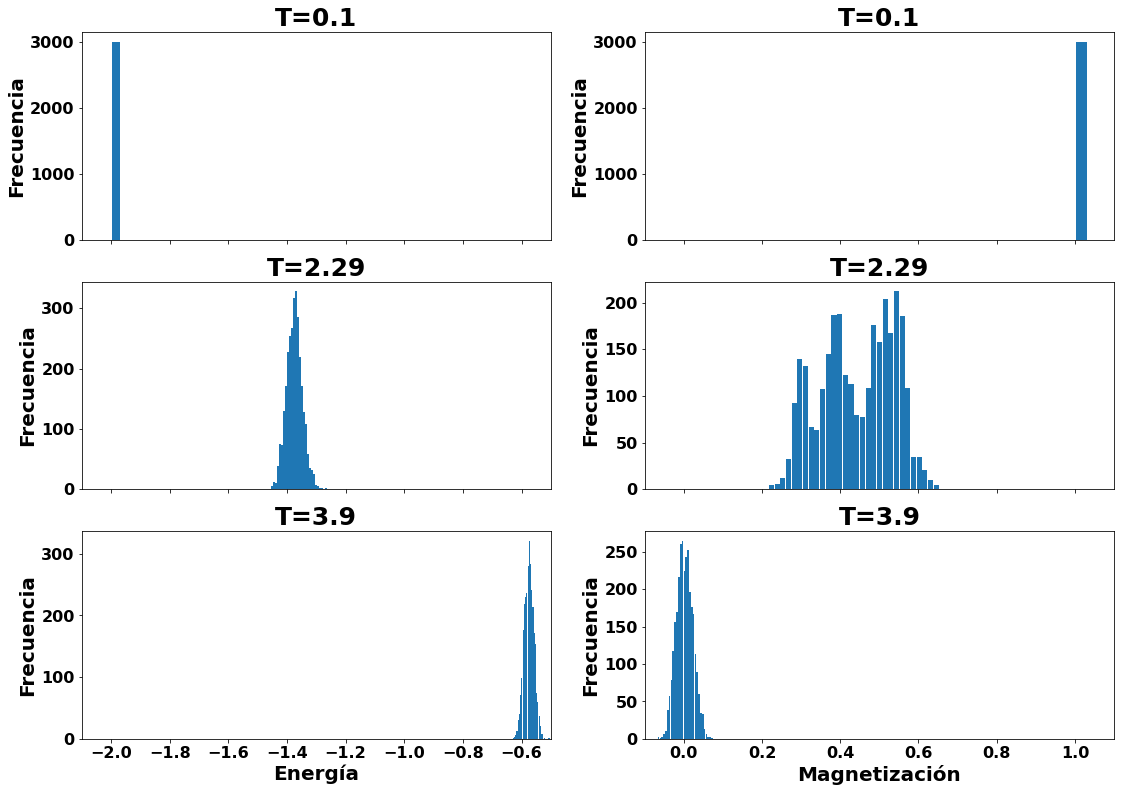

In [6]:
size = 100
temperature = [0.1,2.29,3.9]
job = 1
fig, ax = plt.subplots(3,2,sharex='col')
fig.set_size_inches(18.5, 13)

for i in range(3):
    output_file = f'{size}_size/0.0_B/{temperature[i]:.3}_temp/{job:02}_JOB/output.dat'
    run_data = pd.read_csv(output_file, sep='\s+' , names=['energia', 'magnetizacion', 'aceptados'])
    run_data.head()
    run_data.energia=run_data.energia/(size**2)#-run_data.energia.mean()/(size**2)
    run_data.magnetizacion=run_data.magnetizacion/(size**2)#+run_data.magnetizacion.mean()/(size**2)

    run_data['energia'].plot.hist(bins=30, rwidth=0.9,ax=ax[i,0])
    ax[i,0].set_title('T='+str(temperature[i]), fontsize=25, weight='bold')
    ax[i,0].set_xlabel('Energía', fontsize=20, weight='bold' )
    ax[i,0].set_xlim(-2.1,-0.5)
    ax[i,0].set_ylabel('Frecuencia', fontsize=20, weight='bold' )
    
    run_data['magnetizacion'].plot.hist(bins=30, rwidth=0.9, ax=ax[i,1])
    ax[i,1].set_title('T='+str(temperature[i]), fontsize=25, weight='bold')
    ax[i,1].set_xlabel('Magnetización', fontsize=20, weight='bold' )
    ax[i,1].set_xlim(-0.1,1.1)
    ax[i,1].set_ylabel('Frecuencia', fontsize=20, weight='bold' )
run_data['magnetizacion'].size

In [27]:
data = data_raw.groupby(['size','temperature', 'B'], as_index=False).mean().drop('job', axis=1)


data['Cv'] = (data['energy^2']-data['energy']**2)/( data['N']*(data['temperature'])**2)
data['X'] = (data['magnetization^2']-data['magnetization']**2)/(data['temperature'])
data['E'] = data['energy'] / data['N']
data['M'] = data['magnetization'] / data['N']



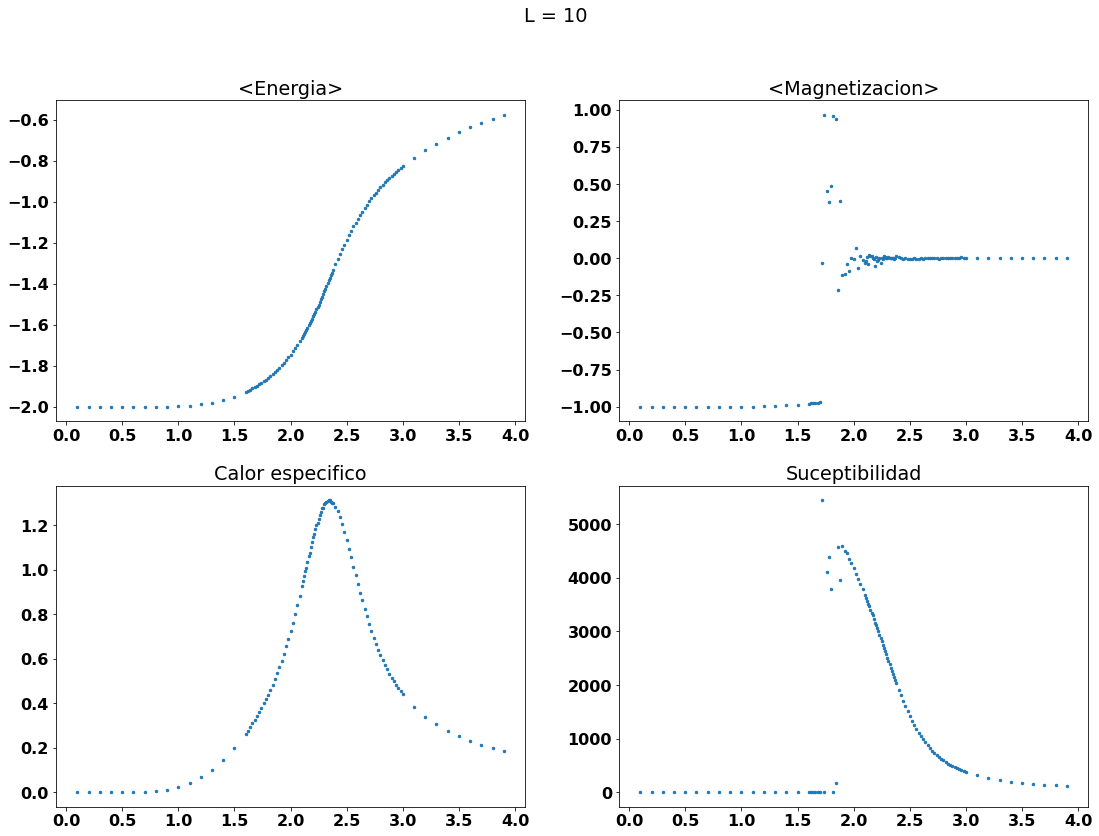

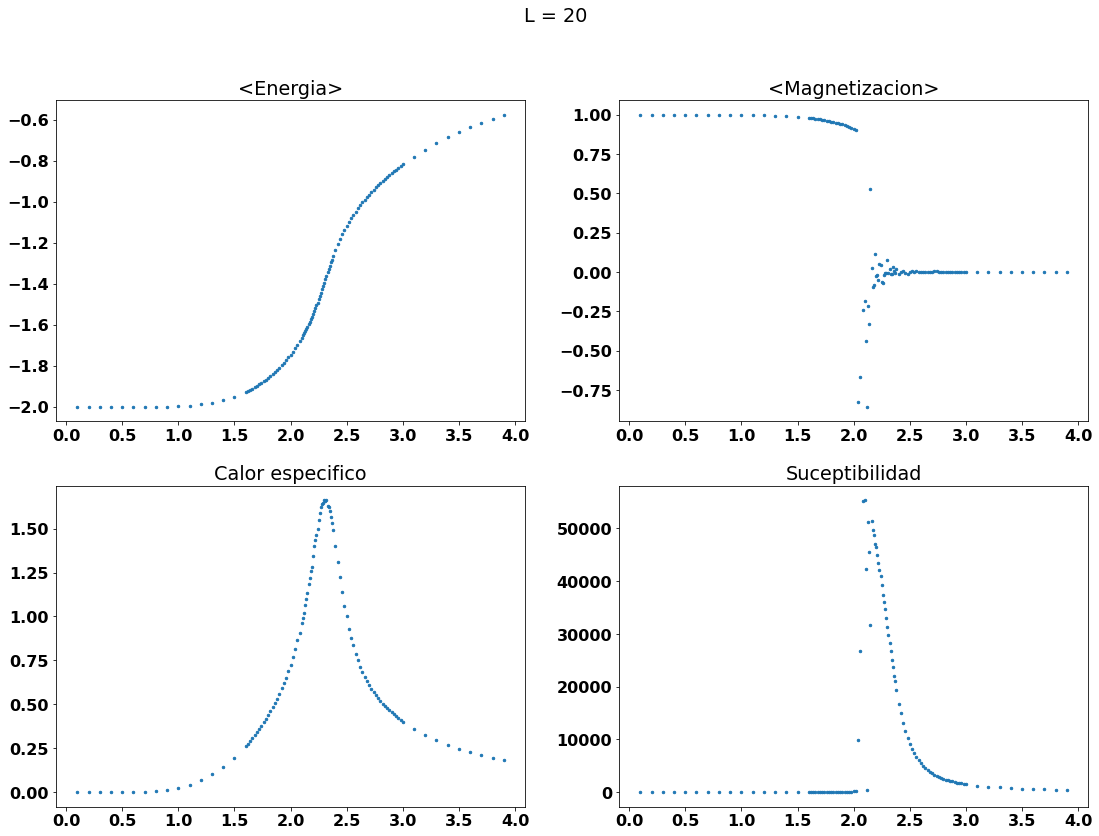

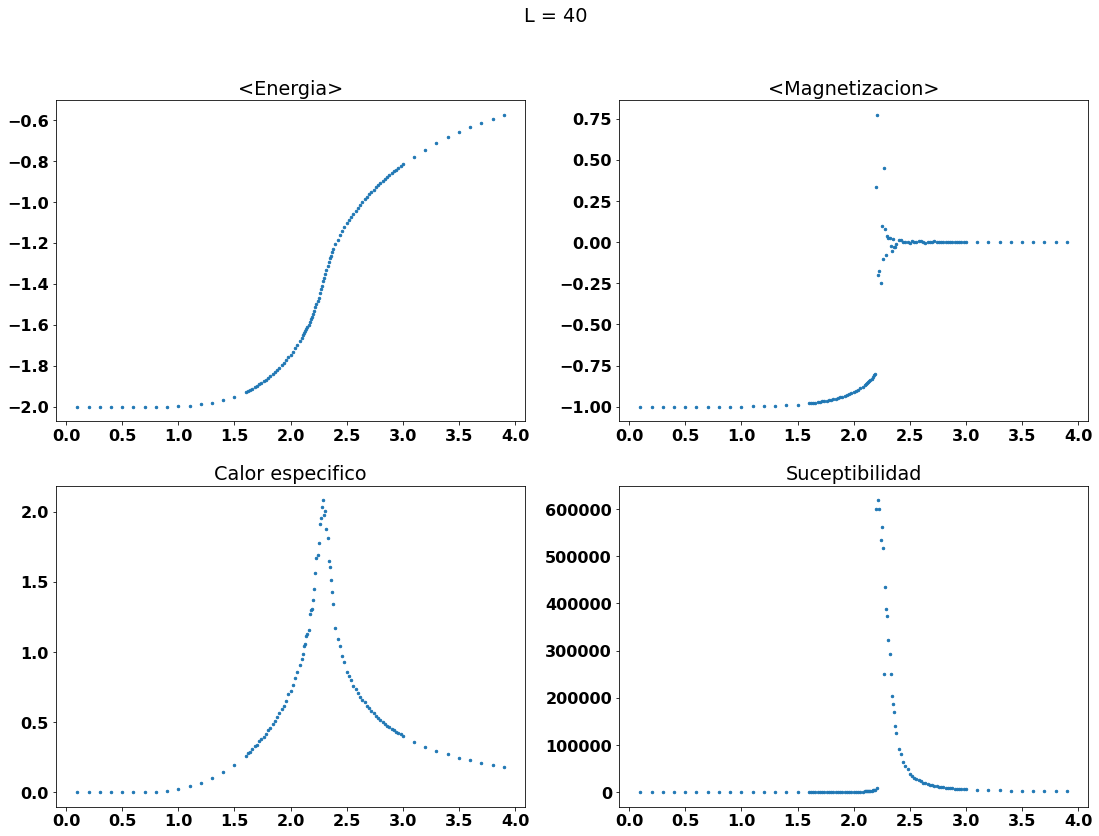

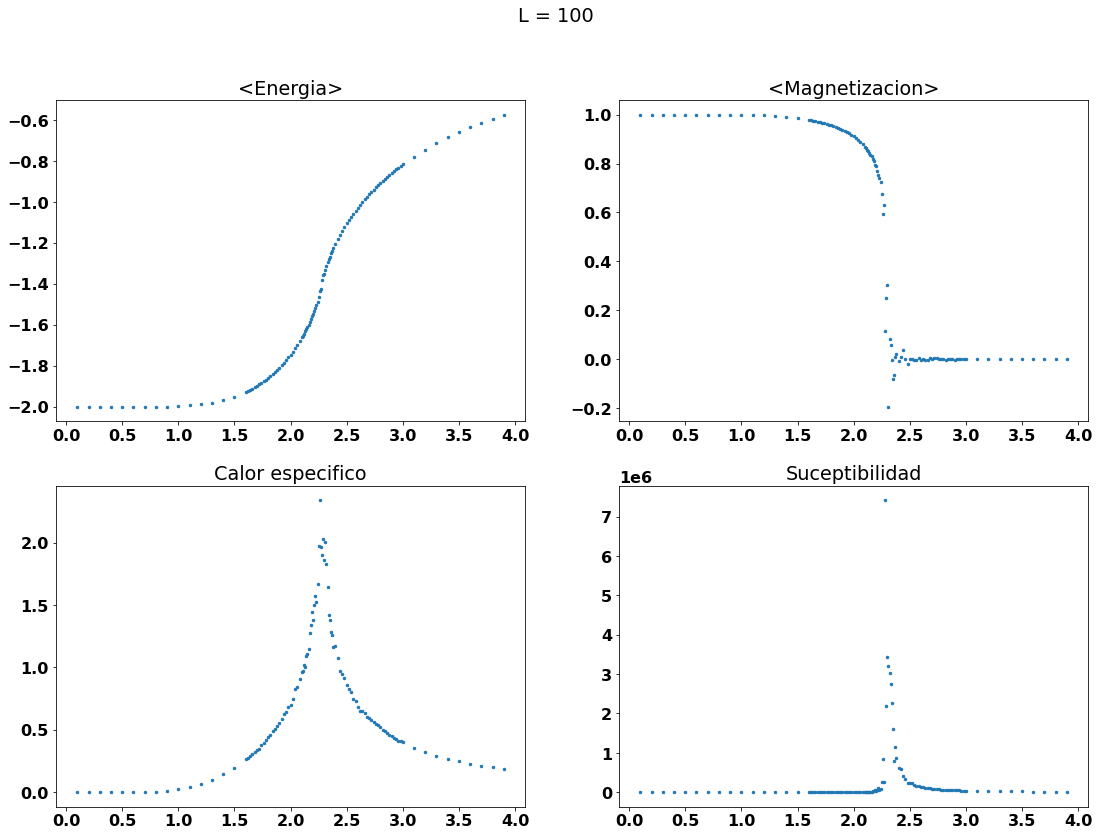

In [24]:
for s in data['size'].unique():
    dataf = data[(data['size']==s) & (data['B']==0.0)]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(18.5, 13)
    fig.suptitle(f'L = {s}')
    plot(ax2, dataf['temperature'], dataf['M'], '<Magnetizacion>')
    plot(ax1, dataf['temperature'], dataf['E'], '<Energia>')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')
  #  plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados')

plt.show()

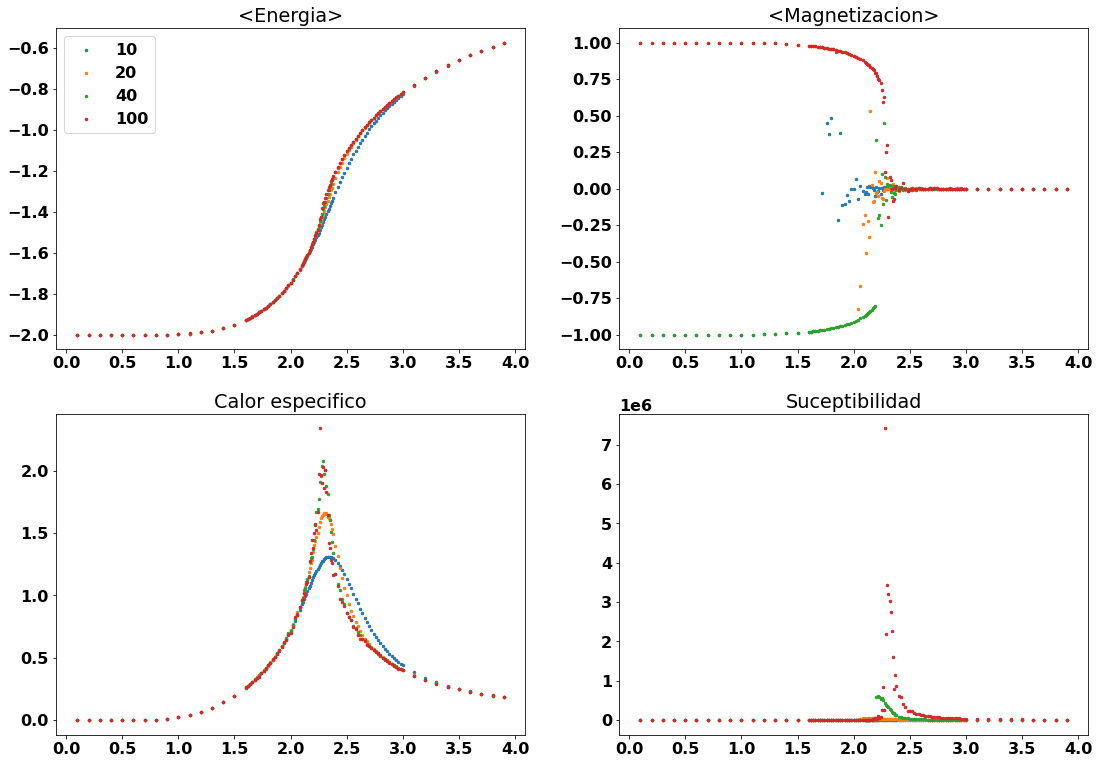

In [35]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(18.5, 13)

for s in data['size'].unique():
    dataf = data[(data['size']==s) & (data['B']==0.0)]
    plot(ax2, dataf['temperature'], dataf['M'], '<Magnetizacion>')
    plot(ax1, dataf['temperature'], dataf['E'], '<Energia>')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')
  #  plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados')
ax1.legend([data['size'].unique()])
#ax2.legend('L=' + str(s))
#ax3.legend('L=' + str(s))
#ax4.legend('L=' + str(s))
plt.show()

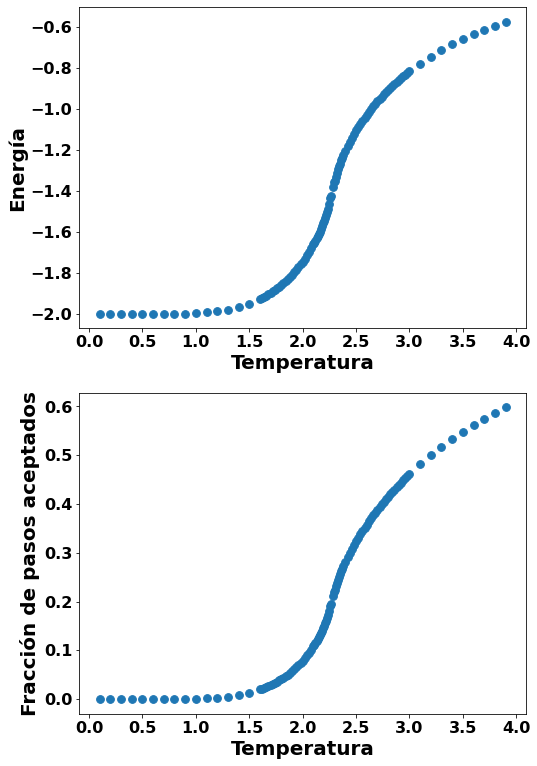

Text(0, 0.5, 'Magnetización')

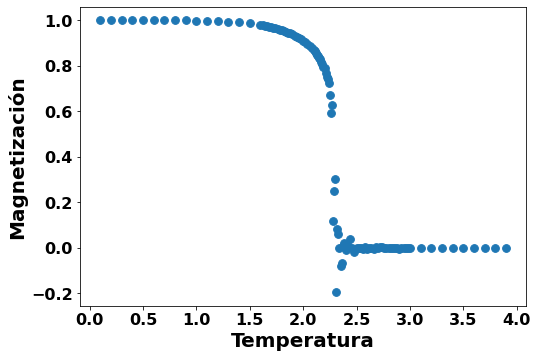

In [10]:
dataf = data[(data['size']==100) & (data['B']==0.0)]
#fig.set_size_inches(18.5, 13)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(8, 13)
#ax1.set_markersize(2)
#fig.suptitle(f'L = {s}')

ax1.scatter(dataf['temperature'], dataf['E'],s=60)
ax1.set_xlabel('Temperatura', fontsize=20, weight='bold' )
ax1.set_ylabel('Energía', fontsize=20, weight='bold' )
ax2.scatter(dataf['temperature'], dataf['aceptados'],s=60)
ax2.set_xlabel('Temperatura', fontsize=20, weight='bold' )
ax2.set_ylabel('Fracción de pasos aceptados', fontsize=20, weight='bold' )

#plot(ax1, dataf['temperature'], dataf['E'])
#plot(ax1, dataf['temperature'], dataf['Cv'])
#plot(ax1, dataf['temperature'], dataf['X'])
  #  plot(ax5, dataf['temperature'], dataf['aceptados'], 'Fracción de pasos aceptados')

plt.show()
ax3=plt.figure()
ax3.set_size_inches(8, 5.5)
plt.scatter(dataf['temperature'], dataf['M'],s=60)
plt.xlabel('Temperatura', fontsize=20, weight='bold' )
plt.ylabel('Magnetización', fontsize=20, weight='bold' )


In [11]:
dataf[dataf['X']==max(dataf['X'])]

,size,temperature,B,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N,Cv,X,E,M
385,100,2.28,0.0,-13804.724692,1.906693e+08,1169.322426,1.828598e+07,0.212077,3811.842386,10000.0,19017.281914,7.420467e+06,-1.380472,0.116932


Text(0, 0.5, 'Calor específico')

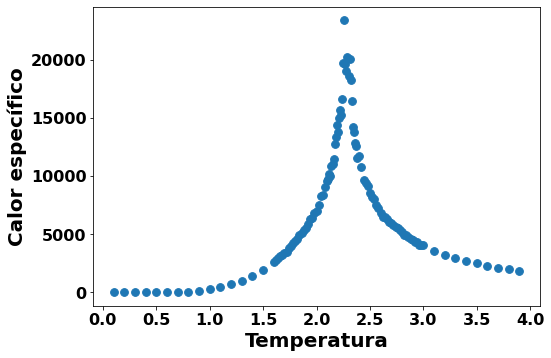

In [12]:
plt.show()
ax3=plt.figure()
ax3.set_size_inches(8, 5.5)
plt.scatter(dataf['temperature'], dataf['Cv'],s=60)
plt.xlabel('Temperatura', fontsize=20, weight='bold' )
plt.ylabel('Calor específico', fontsize=20, weight='bold' )

Text(0, 0.5, 'Susceptibilidad')

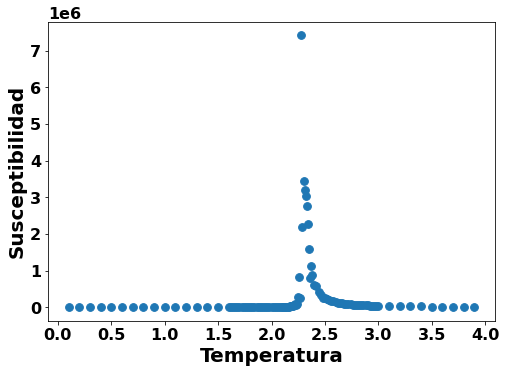

In [13]:
plt.show()
ax3=plt.figure()
ax3.set_size_inches(8, 5.5)
plt.scatter(dataf['temperature'], dataf['X'],s=60)
plt.xlabel('Temperatura', fontsize=20, weight='bold' )
plt.ylabel('Susceptibilidad', fontsize=20, weight='bold' )

In [14]:
dataf[dataf['Cv']==max(dataf['Cv'])]

,size,temperature,B,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N,Cv,X,E,M
383,100,2.26,0.0,-14367.369677,2.065408e+08,5939.184738,3.715352e+07,0.191132,5939.184738,10000.0,23402.99638,831683.110494,-1.436737,0.593918


In [15]:
dataf[dataf['temperature']==3.8]

,size,temperature,B,energy,energy^2,magnetization,magnetization^2,aceptados,amag,N,Cv,X,E,M
434,100,3.8,0.0,-5940.945551,3.532370e+07,-9.926158,48617.630656,0.586849,12.105165,10000.0,1998.871551,12768.184749,-0.594095,-0.000993


In [16]:
range(2)[1]

1